https://oco2.gesdisc.eosdis.nasa.gov/data/OCO2_DATA/OCO2_L1aIn_Pixel.10r/2016/013/
https://oco2.gesdisc.eosdis.nasa.gov/data/OCO2_DATA/OCO2_L1aIn_Pixel.10r/2016/013/oco2_L1aInDP_08153a_160113_B10000r_191017041723.h5

In [3]:
import h5py
import yt
import netCDF4 as nc
import matplotlib.pyplot as plt
import pygrib
import pandas as pd
import xarray as xr
import cfgrib
import ipywidgets
import numpy as np

In [38]:
oco2 = h5py.File('data/oco2_L1aInDP_08153a_160113_B10000r_191017041723.h5')
oco2_nc = nc.Dataset('data/oco2_L1aInDP_24040a_190108_B10000r_200207015244.h5.nc4')

In [39]:
list(oco2.keys())

['CryocoolerData',
 'Dimensions',
 'EngineeringData',
 'FrameConfiguration',
 'FrameFPATemperatures',
 'FrameHeader',
 'FrameSinglePixelMeasurements',
 'Metadata',
 'Shapes',
 'SmoothedTemps']

In [41]:
oco2['CryocoolerData'].keys()

<KeysViewHDF5 ['i_cry_acel_ovrld', 'i_cry_amp_tmp_trp_hi', 'i_cry_amp_tmp_trp_lo', 'i_cry_ampctrl_enb', 'i_cry_auto_frz_enb', 'i_cry_avg_cur1n', 'i_cry_avg_cur1p', 'i_cry_avg_cur2n', 'i_cry_avg_cur2p', 'i_cry_bad_cmd_val', 'i_cry_bad_frq_val', 'i_cry_bus_60v_err', 'i_cry_cage_cmd_event', 'i_cry_cage_rly_st_0', 'i_cry_cage_rly_st_1', 'i_cry_cage_state', 'i_cry_cca_tmp_rate', 'i_cry_cce_5v_mon', 'i_cry_cce_amp_temp', 'i_cry_cce_chksum', 'i_cry_cce_cvtr_temp', 'i_cry_cce_fault_out', 'i_cry_cce_pwr_enb', 'i_cry_cce_safehold_input', 'i_cry_cce_tmp_rate', 'i_cry_ccie_bcmd_cntr', 'i_cry_ccie_cmd_cntr', 'i_cry_ccie_cmd_hdr', 'i_cry_ccie_msg_pntr', 'i_cry_ccie_param', 'i_cry_cdhd_tmp_hi', 'i_cry_cdhd_tmp_lo', 'i_cry_cdhd_tmp_rate', 'i_cry_ch_temp', 'i_cry_chdh_tr_enb', 'i_cry_cmd_cnt', 'i_cry_cmd_def_case', 'i_cry_cmd_echo_enb', 'i_cry_cmd_state_event', 'i_cry_cmp_trp_hi', 'i_cry_cmp_trp_lo', 'i_cry_conv_tmp_trp_hi', 'i_cry_conv_tmp_trp_lo', 'i_cry_cp_temp', 'i_cry_csync_ctrl', 'i_cry_csync_ctr

In [65]:
oco2['CryocoolerData'].keys()

<KeysViewHDF5 ['i_cry_acel_ovrld', 'i_cry_amp_tmp_trp_hi', 'i_cry_amp_tmp_trp_lo', 'i_cry_ampctrl_enb', 'i_cry_auto_frz_enb', 'i_cry_avg_cur1n', 'i_cry_avg_cur1p', 'i_cry_avg_cur2n', 'i_cry_avg_cur2p', 'i_cry_bad_cmd_val', 'i_cry_bad_frq_val', 'i_cry_bus_60v_err', 'i_cry_cage_cmd_event', 'i_cry_cage_rly_st_0', 'i_cry_cage_rly_st_1', 'i_cry_cage_state', 'i_cry_cca_tmp_rate', 'i_cry_cce_5v_mon', 'i_cry_cce_amp_temp', 'i_cry_cce_chksum', 'i_cry_cce_cvtr_temp', 'i_cry_cce_fault_out', 'i_cry_cce_pwr_enb', 'i_cry_cce_safehold_input', 'i_cry_cce_tmp_rate', 'i_cry_ccie_bcmd_cntr', 'i_cry_ccie_cmd_cntr', 'i_cry_ccie_cmd_hdr', 'i_cry_ccie_msg_pntr', 'i_cry_ccie_param', 'i_cry_cdhd_tmp_hi', 'i_cry_cdhd_tmp_lo', 'i_cry_cdhd_tmp_rate', 'i_cry_ch_temp', 'i_cry_chdh_tr_enb', 'i_cry_cmd_cnt', 'i_cry_cmd_def_case', 'i_cry_cmd_echo_enb', 'i_cry_cmd_state_event', 'i_cry_cmp_trp_hi', 'i_cry_cmp_trp_lo', 'i_cry_conv_tmp_trp_hi', 'i_cry_conv_tmp_trp_lo', 'i_cry_cp_temp', 'i_cry_csync_ctrl', 'i_cry_csync_ctr

In [68]:
oco2['EngineeringData'].keys()

<KeysViewHDF5 ['adc_ref_volt', 'adc_volt_5a', 'adc_volt_5d', 'afe1_power_state', 'afe2_power_state', 'afe3_power_state', 'analog_supp_volt_n5', 'analog_supp_volt_p5', 'cal_door_pos_coarse', 'cal_door_pos_n_steps', 'cal_door_total_steps', 'cal_motor_power_state', 'cmd_flag_history', 'cmd_id_history', 'cmd_msn_history', 'control_flags_ic', 'current_winding', 'digital_supp_volt_n12', 'dp_volt_p5', 'dpp_power_state', 'dsub_volt', 'engineering_time_string', 'err_count', 'err_id_history', 'err_time_history', 'firmware_version_dp0', 'firmware_version_dp1', 'firmware_version_dp2', 'firmware_version_ic', 'gnd_volt', 'heater_state_history', 'heater_turn_off_set_point', 'heater_turn_on_set_point', 'hk_volt_offset', 'lamp1_monitor', 'lamp1_power_state', 'lamp2_monitor', 'lamp2_power_state', 'lamp3_monitor', 'lamp3_power_state', 'logic_volt', 'logic_volt_p5', 'memory_test_status', 'mode_dp0', 'mode_dp1', 'mode_dp2', 'mode_ic', 'motor_winding_spare', 'spare_ihk_byte186', 'spare_ihk_byte187', 'spare_

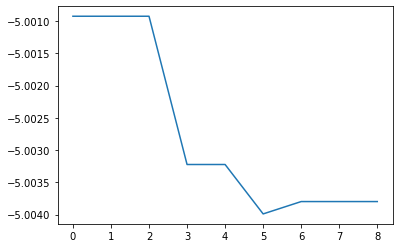

In [75]:
plt.plot(oco2['EngineeringData']['analog_supp_volt_n5'][()])

In [78]:
oco2['CryocoolerData']['i_cry_cmd_state_event'][()]

array([0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=uint8)

[[2.4931452 2.4931452 2.4947426]
 [2.4931452 2.4931452 2.4947426]
 [2.4931452 2.4931452 2.4947426]
 [2.494583  2.4918673 2.4931452]
 [2.494583  2.4918673 2.4931452]
 [2.4931452 2.4921868 2.494583 ]
 [2.4931452 2.4923465 2.494583 ]
 [2.4931452 2.4923465 2.494583 ]
 [2.494583  2.494583  2.4949024]]
[[5.012936  5.0071373 5.012936 ]
 [5.012936  5.0071373 5.012936 ]
 [5.012936  5.0071373 5.012936 ]
 [5.012936  5.008543  5.012936 ]
 [5.012936  5.008543  5.012936 ]
 [5.012936  5.0074887 5.012936 ]
 [5.012936  5.006786  5.012936 ]
 [5.012936  5.006786  5.012936 ]
 [5.012936  5.00784   5.012936 ]]
[[5.0415783 5.0282235 5.047201 ]
 [5.0415783 5.0282235 5.047201 ]
 [5.0415783 5.0282235 5.047201 ]
 [5.0415783 5.0282235 5.0443897]
 [5.0415783 5.0282235 5.0443897]
 [5.0415783 5.029805  5.0450926]
 [5.0419297 5.0289264 5.0450926]
 [5.0419297 5.0289264 5.0450926]
 [5.042281  5.030332  5.0443897]]
[1 1 1 1 1 1 1 1 1]
[1 1 1 1 1 1 1 1 1]
[1 1 1 1 1 1 1 1 1]
[-5.0009236 -5.0009236 -5.0009236 -5.003224  -

/Users/tzacks2/.conda/envs/DataViz/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/tzacks2/.conda/envs/DataViz/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until


[222 222 222 222 222 222 222 222 222]
[[ 10  10  10 133  10  10  10  10  10  10  10  10  10  10  10  10]
 [ 10  10  10 133  10  10  10  10  10  10  10  10  10  10  10  10]
 [ 10  10  10 133  10  10  10  10  10  10  10  10  10  10  10  10]
 [ 10  10  10 133  10  10  10  10  10  10  10  10  10  10  10  10]
 [ 10  10  10 133  10  10  10  10  10  10  10  10  10  10  10  10]
 [ 10  10  10 133  10  10  10  10  10  10  10  10  10  10  10  10]
 [ 10  10  10 133  10  10  10  10  10  10  10  10  10  10  10  10]
 [ 10  10  10 133  10  10  10  10  10  10  10  10  10  10  10  10]
 [ 10  10  10 133  10  10  10  10  10  10  10  10  10  10  10  10]]
[[2772929836 2772927836 2772925836 2147483836  524393836  524392836
   524389836 3092793132 3092791132 3092789132 2920800132 2920798132
  2920795132 2700471122 2700469122 2700466122]
 [2772929836 2772927836 2772925836 2147483836  524393836  524392836
   524389836 3092793132 3092791132 3092789132 2920800132 2920798132
  2920795132 2700471122 2700469122 2700

/Users/tzacks2/.conda/envs/DataViz/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/tzacks2/.conda/envs/DataViz/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/tzacks2/.conda/envs/DataViz/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figur

[0 0 0 0 0 0 0 0 0]
[15.8591795 15.8591795 15.8591795 15.765667  15.765667  15.88088
 15.882278  15.882278  15.852349 ]
[15.684586 15.684586 15.684586 15.82176  15.82176  15.770971 15.85099
 15.85099  15.782278]
[20.357353 20.357353 20.357353 20.38913  20.38913  20.394936 20.381514
 20.381514 20.37527 ]
[17.019829 17.019829 17.019829 17.027853 17.027853 16.981583 16.92219
 16.92219  16.973902]
[16.235828 16.235828 16.235828 16.21161  16.21161  16.182327 16.102713
 16.102713 16.13638 ]
[16.097565 16.097565 16.097565 16.11704  16.11704  16.06865  16.08744
 16.08744  16.005379]
[44103 44103 44103 44097 44097 44103 44099 44099 44102]
[44115 44115 44115 44103 44103 44116 44102 44102 44100]
[22055 22055 22055 22051 22051 22058 22044 22044 22050]
[44101 44101 44101 44099 44099 44090 44099 44099 44105]
[44107 44107 44107 44101 44101 44101 44105 44105 44106]
[44097 44097 44097 44100 44100 44101 44097 44097 44100]
[-7.0599046 -7.0599046 -7.0599046 -7.3813276 -7.3813276 -7.582363
 -7.7268276 -7.7

/Users/tzacks2/.conda/envs/DataViz/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/tzacks2/.conda/envs/DataViz/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/tzacks2/.conda/envs/DataViz/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figur

[-5.7978377 -5.7978377 -5.7978377 -5.7699823 -5.7699823 -5.7699823
 -5.8440213 -5.8440213 -5.7635546]
[-12.211695  -12.211695  -12.211695  -12.179007  -12.179007  -11.995797
 -11.88015   -11.88015   -11.7195835]
[-12.365871 -12.365871 -12.365871 -12.203232 -12.203232 -12.153788
 -11.900029 -11.900029 -11.763143]
[-40.070156 -40.070156 -40.070156 -40.141117 -40.141117 -40.202545
 -40.223183 -40.223183 -40.311108]
[65535 65535 65535 65535 65535 65535 65535 65535 65535]
[1.1425164 1.1425164 1.1425164 1.275063  1.275063  1.1655087 1.1715505
 1.1715505 1.2176591]
[5.4321785 5.4321785 5.4321785 5.4035797 5.4035797 5.3065886 4.9424076
 4.9424076 4.7804155]
[4.098384  4.098384  4.098384  4.201828  4.201828  4.2305183 4.2194014
 4.2194014 4.138408 ]
[-21.985094 -21.985094 -21.985094 -21.786186 -21.786186 -21.493647
 -21.243626 -21.243626 -20.949444]
[-20.954779 -20.954779 -20.954779 -20.750313 -20.750313 -20.4464
 -20.10556  -20.10556  -19.765432]
[0 0 0 0 0 0 0 0 0]
[[2.3116746 2.3091187 2.303

/Users/tzacks2/.conda/envs/DataViz/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/tzacks2/.conda/envs/DataViz/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/tzacks2/.conda/envs/DataViz/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figur

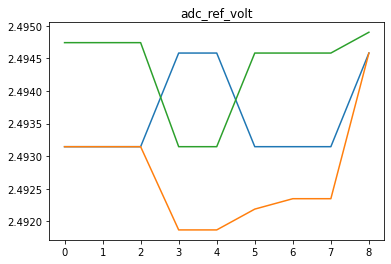

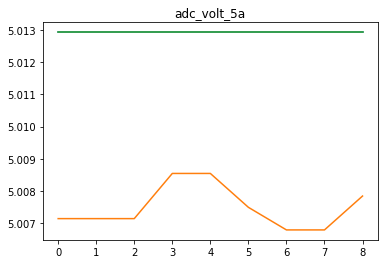

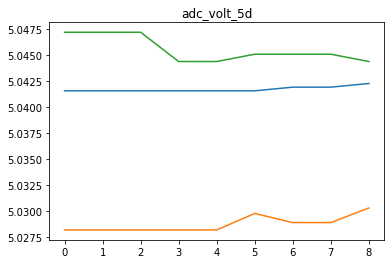

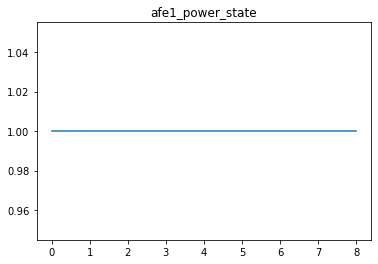

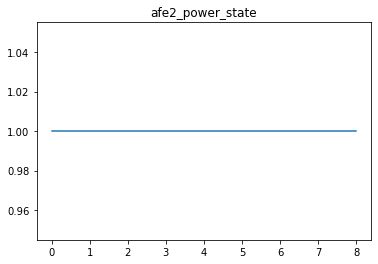

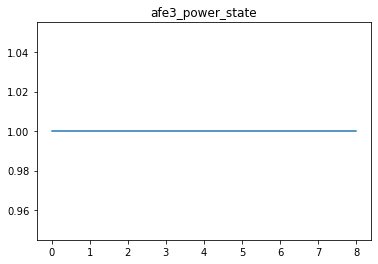

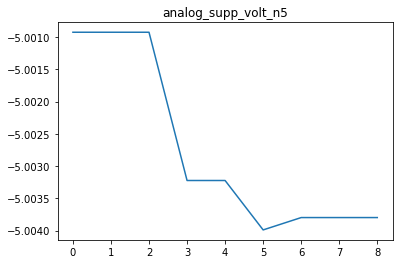

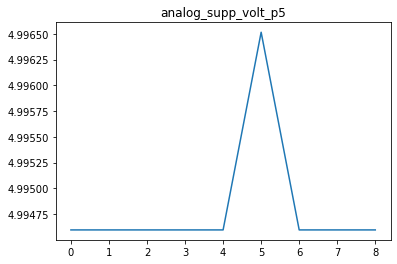

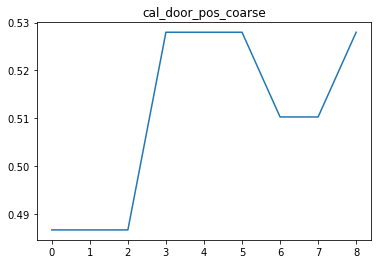

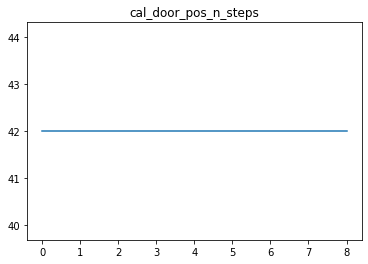

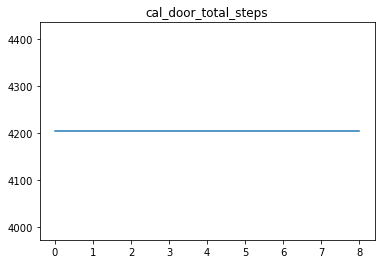

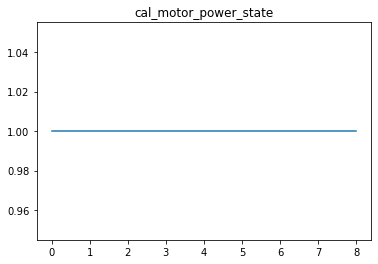

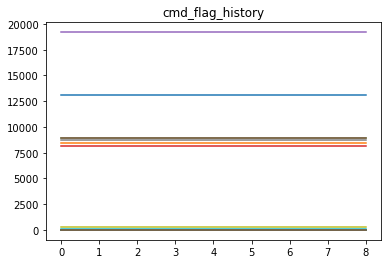

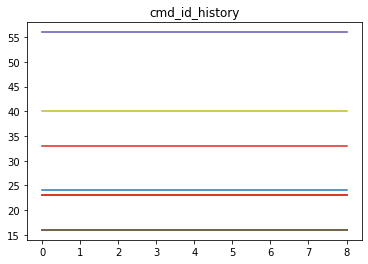

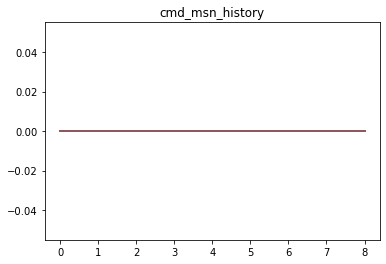

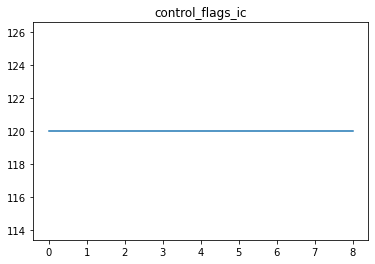

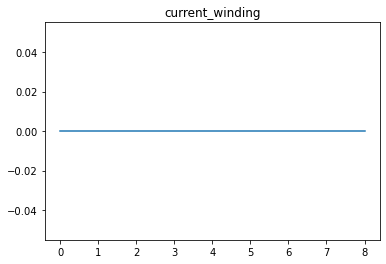

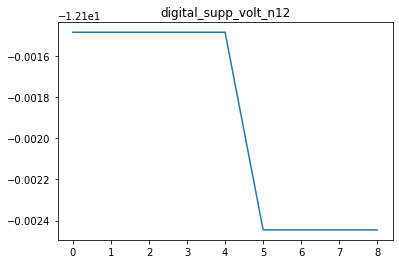

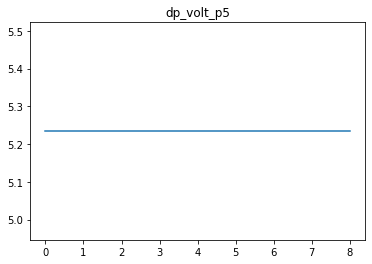

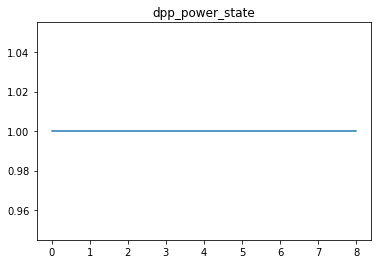

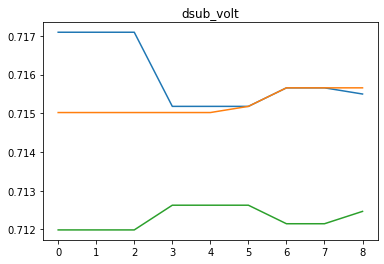

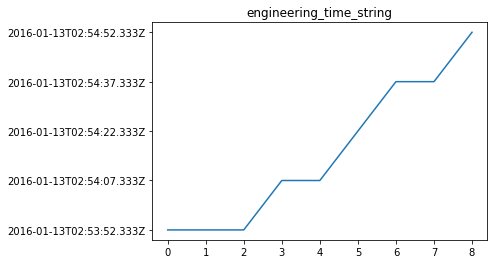

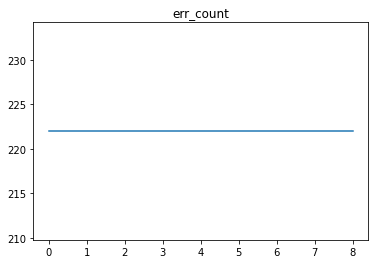

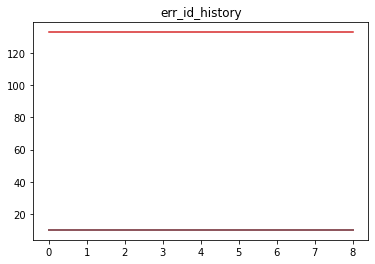

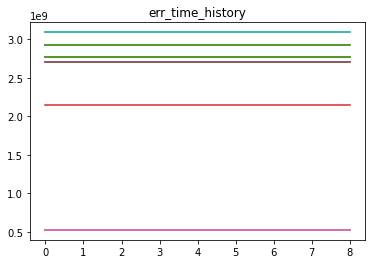

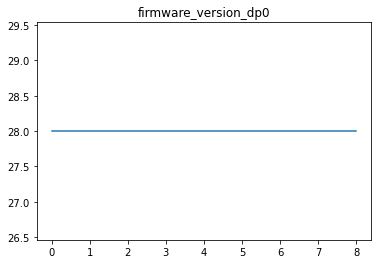

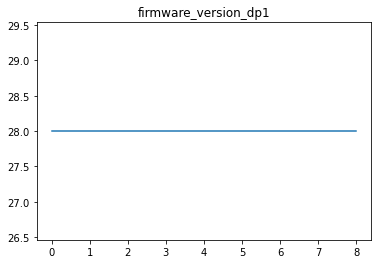

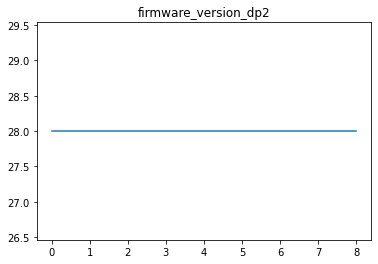

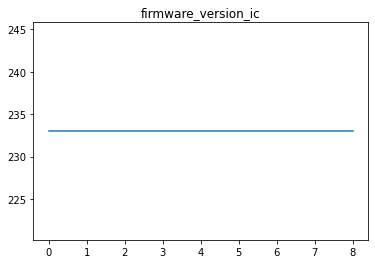

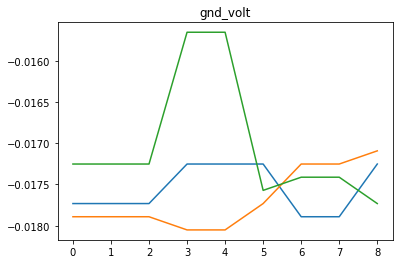

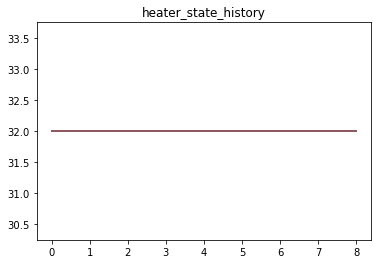

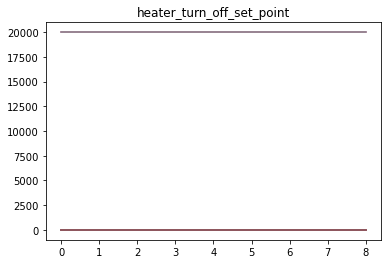

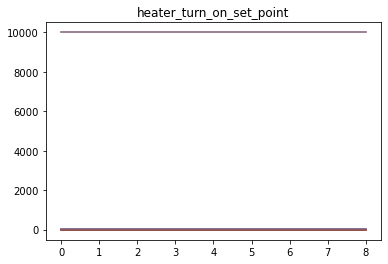

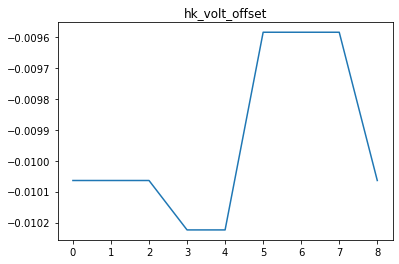

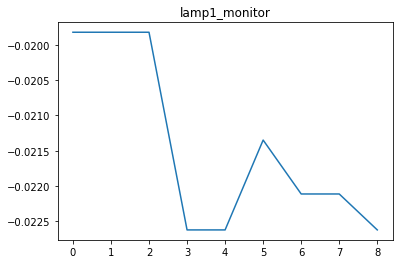

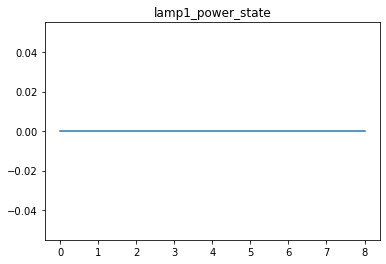

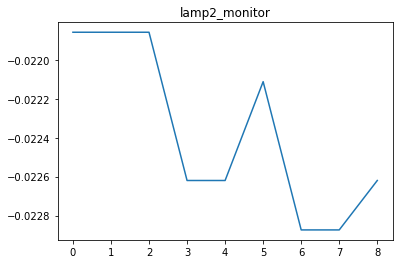

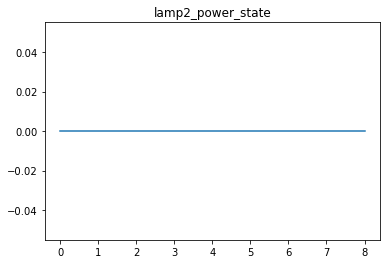

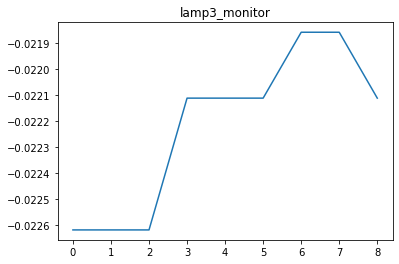

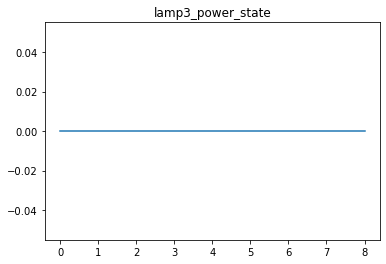

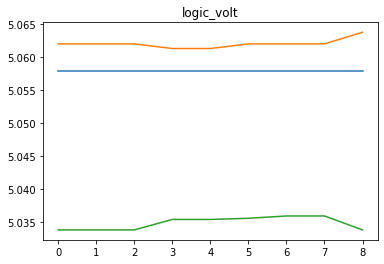

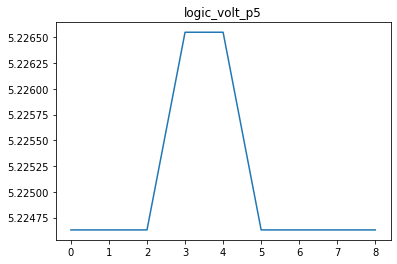

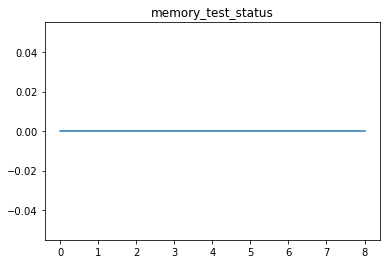

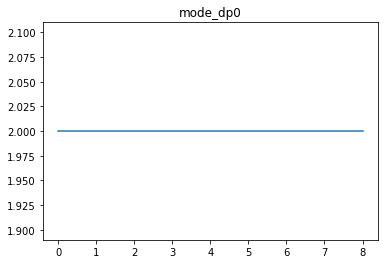

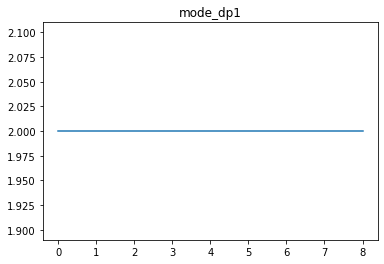

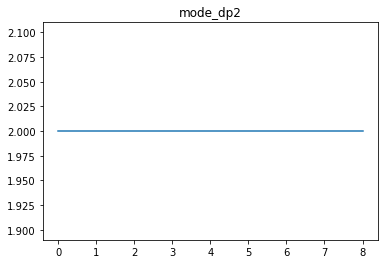

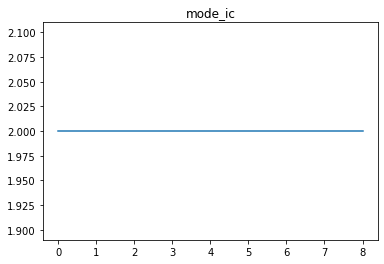

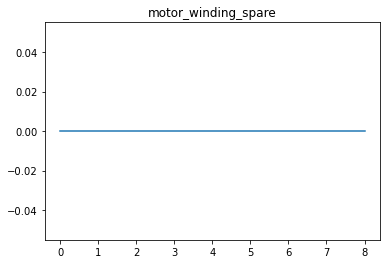

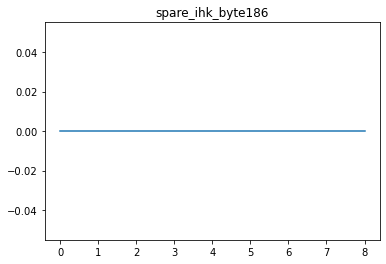

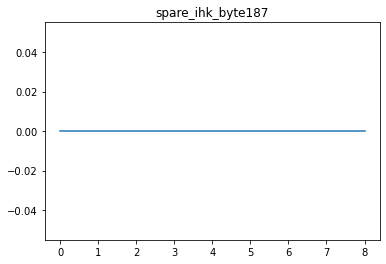

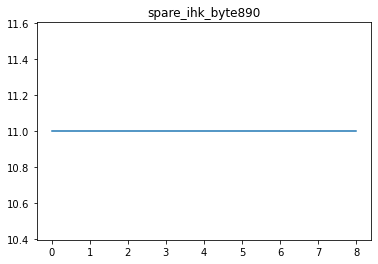

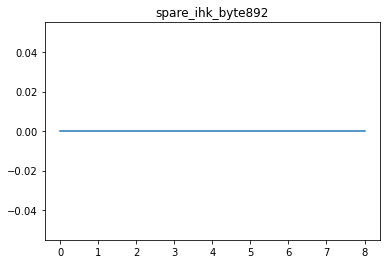

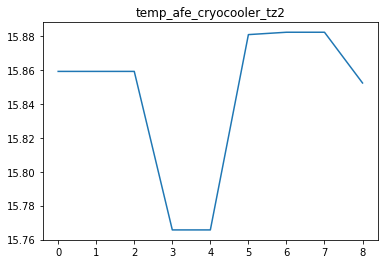

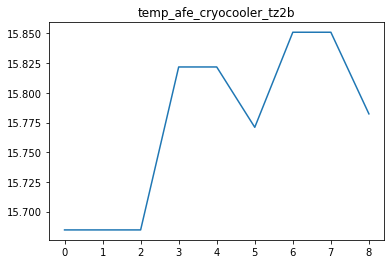

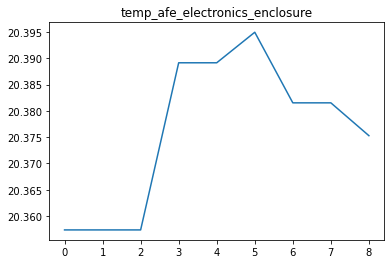

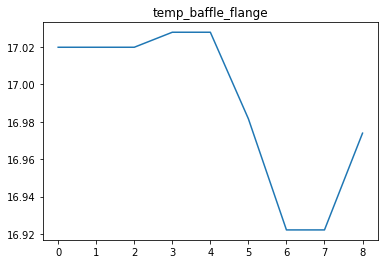

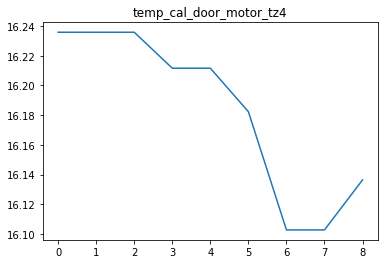

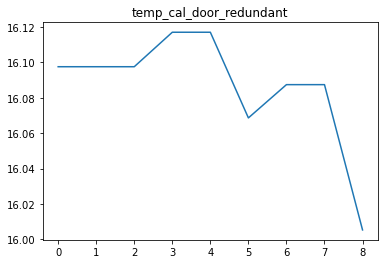

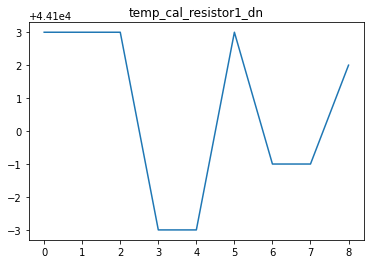

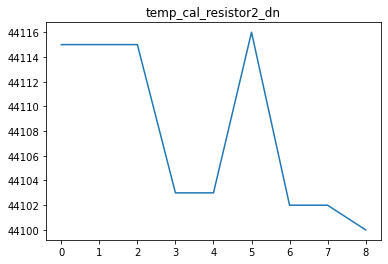

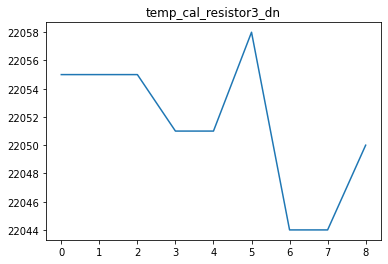

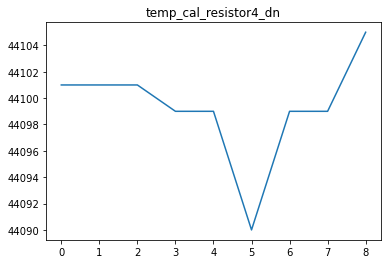

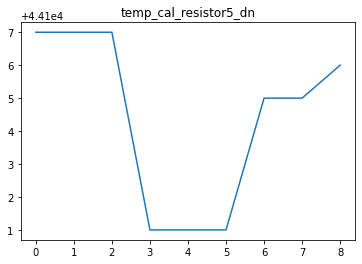

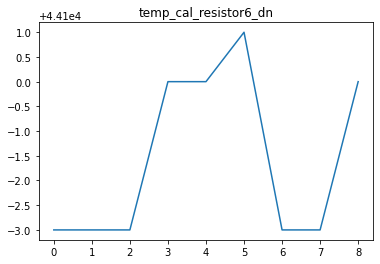

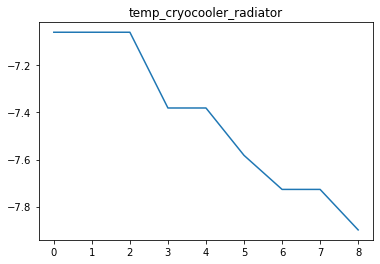

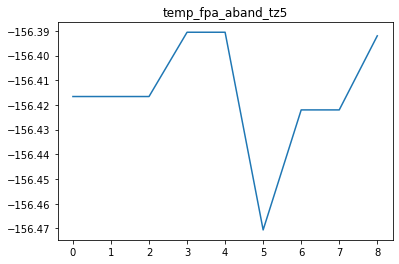

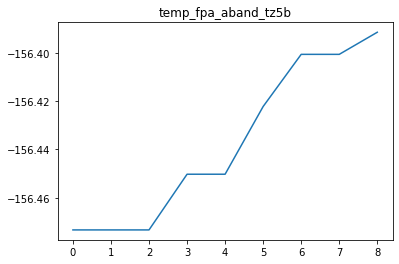

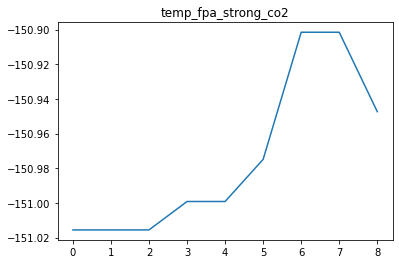

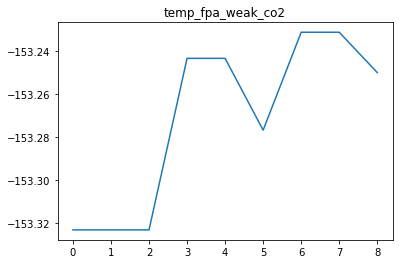

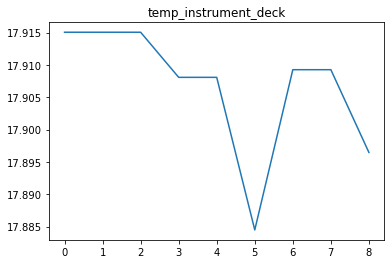

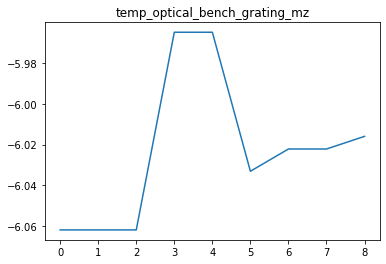

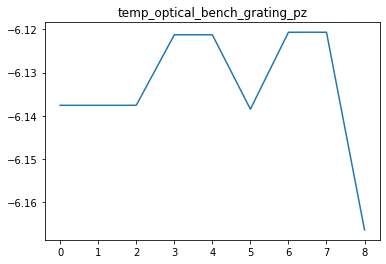

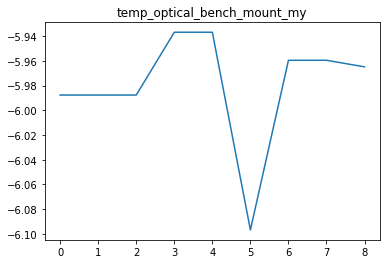

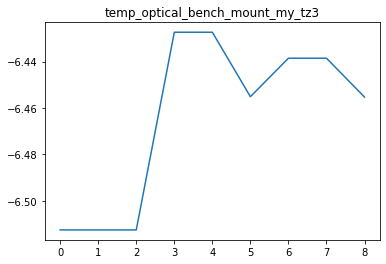

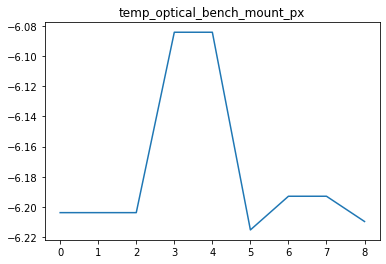

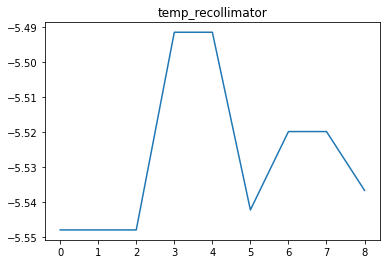

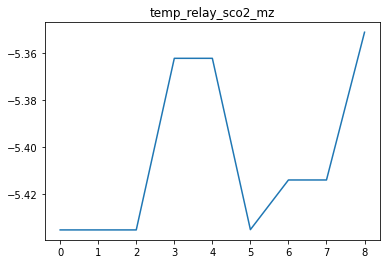

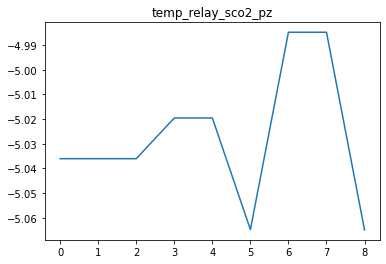

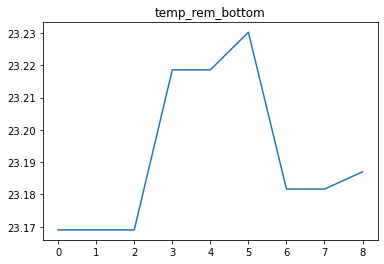

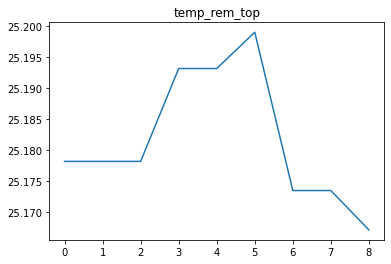

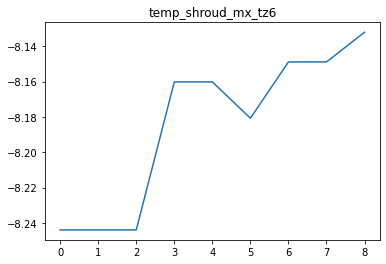

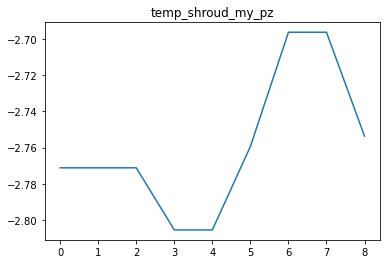

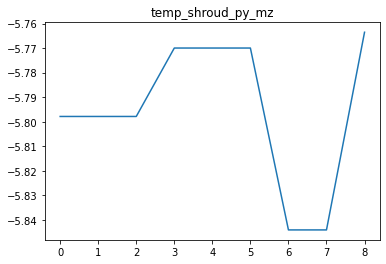

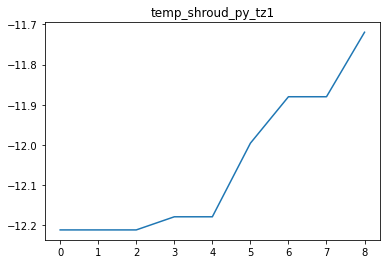

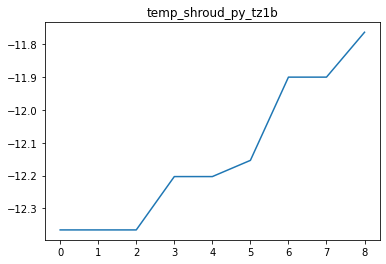

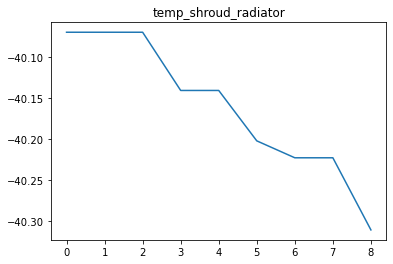

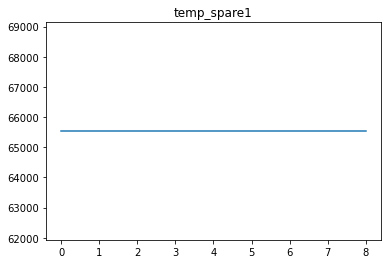

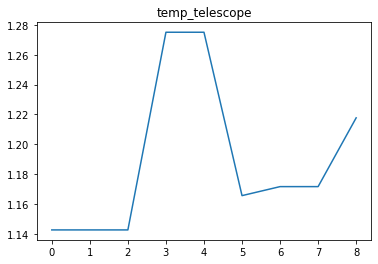

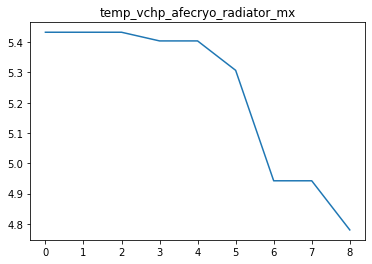

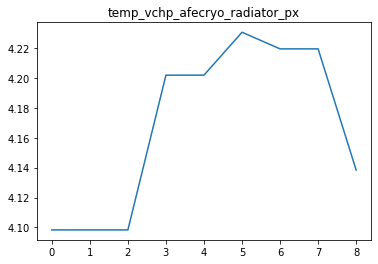

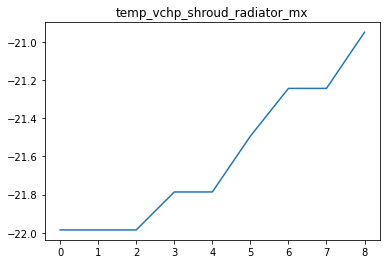

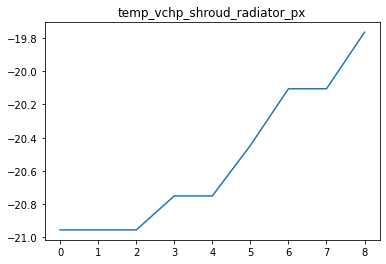

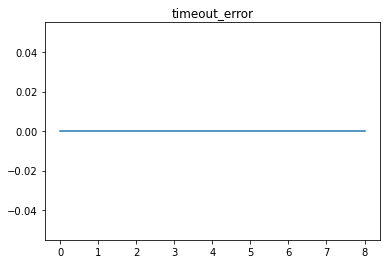

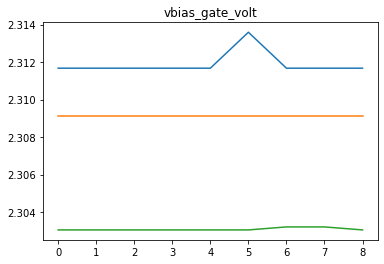

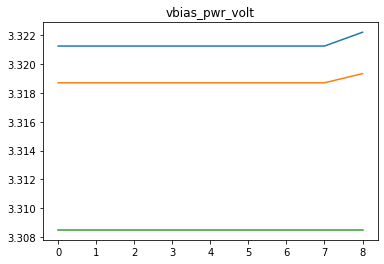

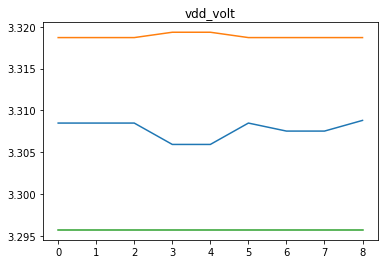

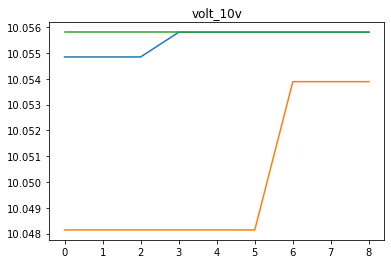

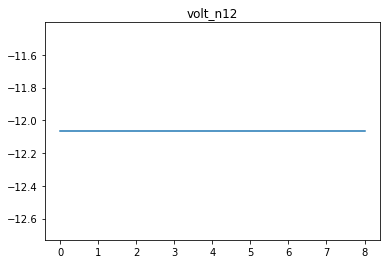

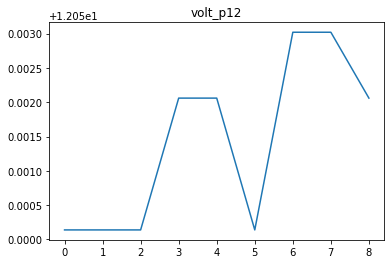

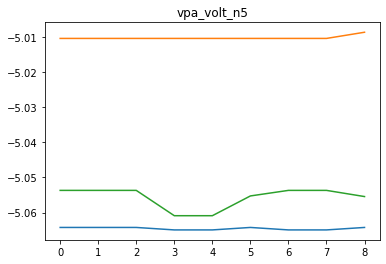

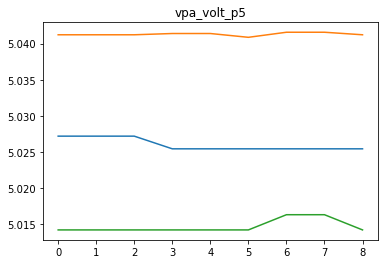

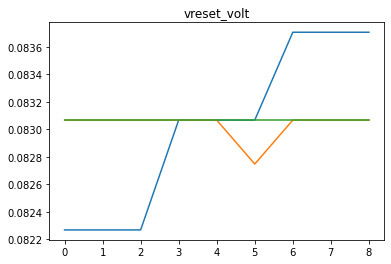

In [84]:
for i in oco2['EngineeringData'].keys():
    print(oco2['EngineeringData'][i][()])
    plt.figure()
    plt.plot((oco2['EngineeringData'][i][()]))
    plt.title(i)

In [40]:
oco2_nc

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4_CLASSIC data model, file format HDF5):
    Dimensions_AncFile.Size: 11
    Dimensions_AncFile.Description: Number of ancillary input files.
    Dimensions_AncFile.fullnamepath: /Dimensions/AncFile
    Dimensions_CCIEHdr.Size: 4
    Dimensions_CCIEHdr.Description: Crycooler CCIE Command Header.
    Dimensions_CCIEHdr.fullnamepath: /Dimensions/CCIEHdr
    Dimensions_CCIEPrm.Size: 4
    Dimensions_CCIEPrm.Description: Crycooler CCIE Parameter Header.
    Dimensions_CCIEPrm.fullnamepath: /Dimensions/CCIEPrm
    Dimensions_Echo.Size: 16
    Dimensions_Echo.Description: Commands/Errors reported in command/error history
    Dimensions_Echo.fullnamepath: /Dimensions/Echo
    Dimensions_FPAColor.Size: 1024
    Dimensions_FPAColor.Description: Index of raw color pixel.
    Dimensions_FPAColor.fullnamepath: /Dimensions/FPAColor
    Dimensions_Frame.Size: 9
    Dimensions_Frame.Description: Index of frame in granule.
    Dimensions_Frame.fulln

In [110]:
FrameSinglePixelMeasurements = oco2['FrameSinglePixelMeasurements']
oco2['FrameSinglePixelMeasurements'].keys()

<KeysViewHDF5 ['color_slice_data_o2', 'color_slice_data_strong_co2', 'color_slice_data_weak_co2', 'single_pixel_integrated_o2', 'single_pixel_integrated_strong_co2', 'single_pixel_integrated_weak_co2', 'single_pixel_o2_qual_flag', 'single_pixel_pedestal_o2', 'single_pixel_pedestal_strong_co2', 'single_pixel_pedestal_weak_co2', 'single_pixel_strong_co2_qual_flag', 'single_pixel_weak_co2_qual_flag']>

In [96]:
for i in oco2['FrameSinglePixelMeasurements'].keys():
    print(oco2['FrameSinglePixelMeasurements'][i])

<HDF5 dataset "color_slice_data_o2": shape (9, 20, 220), type "<u2">
<HDF5 dataset "color_slice_data_strong_co2": shape (9, 20, 220), type "<u2">
<HDF5 dataset "color_slice_data_weak_co2": shape (9, 20, 220), type "<u2">
<HDF5 dataset "single_pixel_integrated_o2": shape (9, 220, 1024), type "<u2">
<HDF5 dataset "single_pixel_integrated_strong_co2": shape (9, 220, 1024), type "<u2">
<HDF5 dataset "single_pixel_integrated_weak_co2": shape (9, 220, 1024), type "<u2">
<HDF5 dataset "single_pixel_o2_qual_flag": shape (9, 220), type "<u2">
<HDF5 dataset "single_pixel_pedestal_o2": shape (9, 220, 1024), type "<u2">
<HDF5 dataset "single_pixel_pedestal_strong_co2": shape (9, 220, 1024), type "<u2">
<HDF5 dataset "single_pixel_pedestal_weak_co2": shape (9, 220, 1024), type "<u2">
<HDF5 dataset "single_pixel_strong_co2_qual_flag": shape (9, 220), type "<u2">
<HDF5 dataset "single_pixel_weak_co2_qual_flag": shape (9, 220), type "<u2">


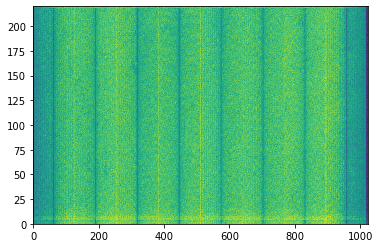

In [111]:
plt.pcolormesh((FrameSinglePixelMeasurements["single_pixel_integrated_o2"][0]))

In [133]:
for i in (FrameSinglePixelMeasurements["single_pixel_integrated_o2"]):
    print(i,(i).shape)
#     plt.pcolormesh((FrameSinglePixelMeasurements["single_pixel_integrated_o2"][i]))

[[3364 3034 3073 ... 3399 3483 3236]
 [3488 2980 3378 ... 3517 3725 3283]
 [3697 2677 3265 ... 3590 3285 3185]
 ...
 [2564 1649 1999 ... 2912 2858 2615]
 [2313 1881 2075 ... 2858 2625 2542]
 [2424 2824 2824 ... 3290 2866 2800]] (220, 1024)
[[3368 3043 3106 ... 3441 3476 3242]
 [3492 2973 3384 ... 3541 3729 3304]
 [3701 2706 3264 ... 3582 3289 3195]
 ...
 [2568 1657 1987 ... 2927 2847 2605]
 [2309 1903 2074 ... 2869 2619 2539]
 [2436 2825 2809 ... 3294 2866 2807]] (220, 1024)
[[3355 3046 3080 ... 3424 3454 3245]
 [3496 2949 3382 ... 3540 3721 3300]
 [3704 2700 3277 ... 3600 3294 3195]
 ...
 [2565 1669 1998 ... 2922 2834 2614]
 [2325 1889 2069 ... 2865 2624 2529]
 [2439 2819 2809 ... 3304 2852 2803]] (220, 1024)
[[3368 3031 3080 ... 3412 3469 3212]
 [3485 2974 3376 ... 3545 3729 3291]
 [3704 2704 3266 ... 3611 3291 3192]
 ...
 [2578 1674 1994 ... 2931 2850 2600]
 [2324 1899 2069 ... 2858 2631 2524]
 [2420 2804 2813 ... 3312 2870 2817]] (220, 1024)
[[3362 3037 3081 ... 3428 3481 3231]
 [3

In [105]:
zero_one_diff = (oco2['FrameSinglePixelMeasurements']["single_pixel_integrated_o2"][1])-(oco2['FrameSinglePixelMeasurements']["single_pixel_integrated_o2"][0])

[[    4     9    33 ...    42 65529     6]
 [    4 65529     6 ...    24     4    21]
 [    4    29 65535 ... 65528     4    10]
 ...
 [    4     8 65524 ...    15 65525 65526]
 [65532    22 65535 ...    11 65530 65533]
 [   12     1 65521 ...     4     0     7]]


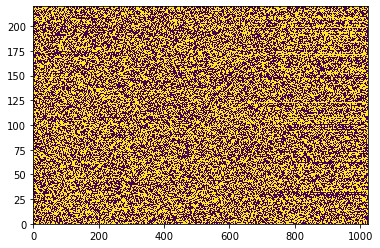

In [108]:
print(zero_one_diff)
plt.pcolormesh(zero_one_diff)